# Slider Classification Model


A jupyter notebook to create the classification model for the slider

### Getting the dataset

First is to import the necessary libraries needed

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot

Then import the dataset. This dataset was extracted from the sound files.

In [68]:
df = pd.read_csv('Datasets/slider_full_features.csv')

In [105]:
df.shape

(12282, 75)

In [107]:
df.describe()

,Unnamed: 0,Status,SR,y mean,y max,y min,chroma_stft min,chroma_stft mean,chroma_stft max,chroma_cqt min,...,spectral_centroid std,spec_bw std,spec_contrast std,flatness std,rolloff std,poly_0 std,poly_1 std,poly_2 std,tonnetz std,zero_crossing_rate std
count,12282.000000,12282.000000,12282.0,1.228200e+04,12282.000000,12282.000000,12282.000000,12282.000000,12282.0,12282.000000,...,12282.000000,12282.000000,12282.000000,12282.000000,12282.000000,12282.000000,12282.000000,12282.000000,12282.000000,12282.000000
mean,2046.500000,0.217391,22050.0,-2.869167e-07,0.032880,-0.032640,0.040161,0.423093,1.0,0.190376,...,262.754317,162.362467,18.163170,0.000482,626.037053,0.012605,0.098316,0.155364,0.053444,0.022289
std,1181.884081,0.412488,0.0,2.191255e-06,0.011141,0.011699,0.035329,0.123739,0.0,0.049660,...,198.152312,111.273047,1.135607,0.000406,439.223381,0.008107,0.040434,0.065976,0.018114,0.018094
min,0.000000,0.000000,22050.0,-1.262625e-05,0.013023,-0.147516,0.000474,0.161258,1.0,0.048784,...,38.402975,24.678135,14.422652,0.000014,87.599978,0.003521,0.034216,0.045802,0.027556,0.003475
25%,1023.000000,0.000000,22050.0,-1.438850e-06,0.024331,-0.040918,0.013067,0.314927,1.0,0.155538,...,87.647937,63.541426,17.383351,0.000207,241.466701,0.005677,0.063449,0.100066,0.040290,0.008072
50%,2046.500000,0.000000,22050.0,-2.384596e-07,0.030220,-0.030086,0.025282,0.406755,1.0,0.192532,...,204.185917,126.087214,18.339175,0.000362,485.896593,0.011611,0.086601,0.136547,0.048847,0.016320
75%,3070.000000,0.000000,22050.0,9.149385e-07,0.040833,-0.023497,0.060748,0.542117,1.0,0.224483,...,406.082208,245.934736,19.027006,0.000615,973.601219,0.016857,0.132904,0.216633,0.062568,0.030326
max,4093.000000,1.000000,22050.0,1.140974e-05,0.164791,-0.013447,0.259311,0.708442,1.0,0.363391,...,960.871508,571.091061,21.694131,0.004642,2114.975078,0.070279,0.236579,0.368078,0.162714,0.096145


Then we only use the features that we needed and save it as df1.

In [70]:
df1 = df[[ 'y mean', 'y max', 'y min', 'chroma_stft min',
       'chroma_stft mean', 'chroma_stft max', 'chroma_cqt min',
       'chroma_cqt mean', 'chroma_cqt max', 'chroma_cens min',
       'chroma_cens mean', 'chroma_cens max', 'melspectogram min',
       'melspectogram mean', 'melspectogram max', 'mfcc min', 'mfcc mean',
       'mfcc max', 'rms min', 'rms mean', 'rms max', 'spectral_centroid min',
       'spectral_centroid mean', 'spectral_centroid max', 'spec_bw min',
       'spec_bw mean', 'spec_bw max', 'spec_contrast min',
       'spec_contrast mean', 'spec_contrast max', 'flatness min',
       'flatness mean', 'flatness max', 'rolloff min', 'rolloff mean',
       'rolloff max', 'poly_0 min', 'poly_0 mean', 'poly_0 max', 'poly_1 min',
       'poly_1 mean', 'poly_1 max', 'poly_2 min', 'poly_2 mean', 'poly_2 max',
       'tonnetz min', 'tonnetz mean', 'tonnetz max', 'zero_crossing_rate min',
       'zero_crossing_rate mean', 'zero_crossing_rate max', 'y std',
       'chroma_stft std', 'chroma_cqt std', 'chroma_cens std',
       'melspectogram std', 'mfcc std', 'rms std', 'spectral_centroid std',
       'spec_bw std', 'spec_contrast std', 'flatness std', 'rolloff std',
       'poly_0 std', 'poly_1 std', 'poly_2 std', 'tonnetz std',
       'zero_crossing_rate std']].copy()

And change the Status column to binary.

In [119]:
df['Status'].replace({'abnormal' : 1, 'normal' : 0}, inplace=True)

We can clearly see here that there is an unbalance targets.

In [120]:
df['Status'].value_counts()

0    9612
1    2670
Name: Status, dtype: int64

Now we assign the df1 as the features (X) and the Status column as the target (y).

In [121]:
X = df1.values
y = df['Status'].values
X.shape, y.shape

((12282, 68), (12282,))

Now that we have the features and target, we can now divide the dataset to 3, training, test and validation set. 

### Divide the data into Training, Test and Validation Set

We will use the `train_test_split` from sklearn to divide the data to three sets.


We will take 10% of the data as the validation set.

In [122]:
X_model, X_validate, y_model, y_validate = train_test_split(X,y,test_size=0.1,random_state = 40)

And then from the remaining 90% we get the 20% for the testing set. 

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_model,y_model,test_size=0.2,random_state = 40)

Based from our exploration, `RandomForestClassifier` is best used for this classification model so here we named it as `rf` to create the model.  

In [127]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9638172772501131

Checking the classification report on the test set.

In [128]:
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1716
           1       0.98      0.85      0.91       495

    accuracy                           0.96      2211
   macro avg       0.97      0.92      0.95      2211
weighted avg       0.96      0.96      0.96      2211



Checking the classification report on the validation set.

In [83]:
print(classification_report(y_validate,validation_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       967
           1       0.97      0.88      0.92       262

    accuracy                           0.97      1229
   macro avg       0.97      0.94      0.95      1229
weighted avg       0.97      0.97      0.97      1229



Saving the model using the pickle library

In [49]:
filename = 'Models/slider_full.sav'
pickle.dump(rf, open(filename, 'wb'))

Plotting the feature importance to have a visual on the features.

Feature: y mean, Score: 0.00285
Feature: y max, Score: 0.00938
Feature: y min, Score: 0.02201
Feature: chroma_stft min, Score: 0.00518
Feature: chroma_stft mean, Score: 0.01126
Feature: chroma_stft max, Score: 0.00000
Feature: chroma_cqt min, Score: 0.00429
Feature: chroma_cqt mean, Score: 0.01206
Feature: chroma_cqt max, Score: 0.00000
Feature: chroma_cens min, Score: 0.00446
Feature: chroma_cens mean, Score: 0.00429
Feature: chroma_cens max, Score: 0.00485
Feature: melspectogram min, Score: 0.00000
Feature: melspectogram mean, Score: 0.02095
Feature: melspectogram max, Score: 0.01899
Feature: mfcc min, Score: 0.00685
Feature: mfcc mean, Score: 0.00914
Feature: mfcc max, Score: 0.00680
Feature: rms min, Score: 0.00637
Feature: rms mean, Score: 0.01999
Feature: rms max, Score: 0.01351
Feature: spectral_centroid min, Score: 0.00428
Feature: spectral_centroid mean, Score: 0.02385
Feature: spectral_centroid max, Score: 0.02564
Feature: spec_bw min, Score: 0.00539
Feature: spec_bw mean, Sc

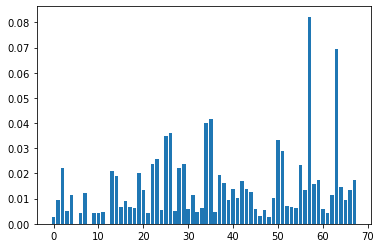

In [130]:
importance = rf.feature_importances_
for i,v in enumerate(importance):
    print(f'Feature: {df1.columns[i]}, Score: {v:.5f}')
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Resampling the data using SMOTE

Trying to do oversampling using SMOTE to even the number of normal and abnormal on the target.

In [84]:
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

Then use again the `RandomForestClassifier` to train the model.

In [86]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train_res, y_train_res)
rf.score(X_test, y_test)

0.9724106739032112

Saving the model again using the `pickle.dump` function.

In [ ]:
filename = 'models/slider_full_with_smote.sav'
pickle.dump(rf, open(filename, 'wb'))

Checking the predictions on the `X_test`.

In [87]:
y_test_pred = rf.predict(X_test)

Checking the True Positive and True Negative using `pd.crosstab` for the test dataset predictions.

In [88]:
pd.crosstab(pd.Series(y_test_pred, name = 'Predicted'),
           pd.Series(y_test, name='Actual'))

Actual,0,1
Predicted,,
0,1693,38
1,23,457


Printing the classification report on the test data set. 

In [90]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1716
           1       0.95      0.92      0.94       495

    accuracy                           0.97      2211
   macro avg       0.97      0.95      0.96      2211
weighted avg       0.97      0.97      0.97      2211



Now let us check the model on the validation set.

In [91]:
validation_test = rf.predict(X_validate)

Then also check the True Positive and True Negative for the validation set. 

In [92]:
pd.crosstab(pd.Series(validation_test, name = 'Predicted'),
           pd.Series(y_validate, name='Actual'))

Actual,0,1
Predicted,,
0,957,32
1,10,230


Then print the classification report for the validation set.

In [93]:

print(classification_report(y_validate,validation_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       967
           1       0.96      0.88      0.92       262

    accuracy                           0.97      1229
   macro avg       0.96      0.93      0.95      1229
weighted avg       0.97      0.97      0.97      1229



And now we have the mode for slider. :)